
# Function minimization - Szélsőérték keresés 



It is pretty common to need to find extreme values of a function. 
An extreme value is often a maximum or minimum in a function, 
and we seek them when we want to maximize a profit function, 
or minimize a cost function or risk.


A mérnöki és gazdasági problémák gyakran költségfüggvények minimalizálásához 
vagy maximalizáásához kapcsolódnak 
(pl. profit maximalizálása, kockázat minimalizálása), 
így rendkívül fontos feladat, 
hogy elsajátítsuk Pythonban a szélesőérétkkeresésre alakalmas eszközök alkalmazását. 

Első körben tekintsük a következő, egyszerüen vizualizálható problémát. 



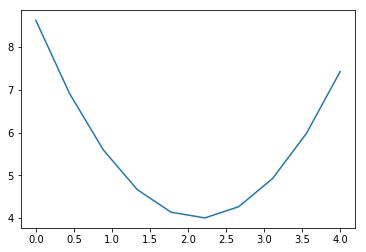

In [15]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def f(x): # let' define a cost function - költségfüggvény definiálása  
    return (x-2.15)**2+4 

x = np.linspace(0, 4,10)
y = f(x)
plt.plot(x, y)

In [16]:
min(y)

4.0052160493827165

In [17]:
y

array([8.6225    , 6.90891975, 5.59040123, 4.66694444, 4.13854938,
       4.00521605, 4.26694444, 4.92373457, 5.97558642, 7.4225    ])

In [18]:
np.argmin(y)

5

In [19]:
x[np.argmin(y)]

2.2222222222222223

You can see there is a minimum near 2. The accuracy depents on the number of points we discretize the function over.

Ahogy látható, a függvény minimuma 2 környékén található. Az optimum helyének pontossága pontossága pedig a diszrektizálás felbontásától függ. 



The method is easy but requires many function evaluations and finds extremes at the borders that are not necessarily fulfill f'(x) = 0.

A módszer előnye egyszerüségében rejlik. Hátránya, hogy adott pontosság eléréséhez nagyon sok függvénykiértékelés szükséges, mely különösen tübbváltozós esetben nem kivitelezhető. 




## Find the derivative, and solve for where it is zero

## Optimum: ahol a derivált nulla 



We can also derive the first derivative / Az első derivált: 

$y' = 2 * (x-2.15) $

and solve it for zero using fsolve /amit fsolve-al megoldhatunk (esetünkben triviális) 



In [20]:
def yp(x):
    return 2 * (x-2.15)

from scipy.optimize import fsolve
fsolve(yp, 0) #0: staring point of the search / keresés kezdeti értéke 

array([2.15])

We can also use a numerical derivative of the function. 

Ha nem akarunk bajlódni a derivált száímtásával, numerikusan is előállíthatjuk


In [21]:
?fsolve

array([2.15])

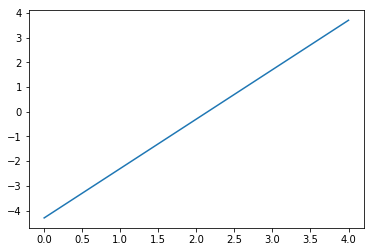

In [22]:
from scipy.misc import derivative

def ypd(x):
    return derivative(f, x, dx=1e-6)

plt.plot(x,ypd(x))
fsolve(ypd, 0.1)

In [23]:
fsolve(ypd, 10.5) 

array([2.15])


## Newton-Raphson method

## Newton-Raphson módszer / egy kis numerikus matek 



To use the Newton-Raphson method to get the minimum, we use an iterative approach with:

$x_{n+1} = x_n - \frac{y'(x_n)}{y''(x_n)}$.

We have to derive these formulas if you want to use analytical derivatives:

$y' = 2 * (x-2.15)$

$y'' = 2$

Alternatively, we can estimate the derivatives numerically using `scipy.misc.derivative`. This has the downside of numerical instability for dx that is too small, or low accuracy if it is too large, and the need to check if you made a good choice for it. On the plus side, it avoids making mistakes in the derivative derivation and implementation.


A N-R módszer alkalmazásával elkerülhető a gyökkrereső algoritmus alkalmazása,
ugyanis követlenül keressük a minimum értéket. 
Különösen fontos felhívni arra a figyelmet, hogy a deriváltakat a numerikus problémák elkerülése érdekében közvetlenül is megadhatjuk. A deviváltakat a `scipy.misc.derivative` függvénnyel is számíthatjuk, mely módszer előnye, hogy analitikusan nehezen kezelehető eseteket is kellő bizonyossággal erőfeszítések nélkül tudunk kezelni. 


In [24]:
from scipy.misc import derivative

x0 = 0 # starting point of the search / keresés kezdeti értéke 
f0 = f(x0)

for i in range(15):  #number of max. iterations / iterációk maximális száma 
    yp = derivative(f, x0, dx=1e-6, n=1)  # y'
    ypp = derivative(f, x0, dx=1e-6, n=2) # y''
    xnew = x0 - yp / ypp
    fnew = f(xnew)

    if np.abs(yp) <= 1e-6: # stoppoing criteria .. / leállási feltétel 
        break #how to step out from the loop / ciklusból kiszállás módja 
    x0 = xnew
    f0 = fnew


xnew, fnew, yp, i

(2.1500000000817203, 4.0, -8.881784197001252e-10, 3)

Fast convergence after three iterations / nagyon gyors konvergencia

There is a built-in function for this!!! 
Nem kell bajlódni, van erre beépített függvény ..


# scipy.optimize.minimize



In [25]:
from scipy.optimize import minimize

In [26]:
x0 = 0.5 #initialize / kedzeti érték 
sol = minimize(f,x0)
sol

      fun: 4.000000000000001
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.15000002])


## Multiple minima



It is possible for functions to have more than one (local) minimum. 
Therefore it is beneficial to start the optimization from a set of different initial guesses.

Gyakran előfordulhat, hogy több lokális minimum van. 
Ilyenkor több kezdeti értékről érdemes indítani az optimálást.


Text(0,0.5,'h(x)')

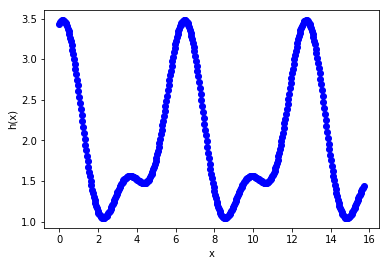

In [29]:
def h(x):
    return 2 + np.cos(x) + np.cos(2*x - 0.5) / 2

x = np.linspace(0, 5 * np.pi, 400)

plt.plot(x, h(x), 'bo-')
plt.xlabel('x')
plt.ylabel('h(x)')

In [30]:
minimize(h, 2)

      fun: 1.0448871783746692
 hess_inv: array([[0.52336562]])
      jac: array([-1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([2.26106175])

In [31]:
minimize(h, 4)

      fun: 1.4758979742813436
 hess_inv: array([[0.94727357]])
      jac: array([-9.08970833e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([4.355456])